In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os


In [2]:
os.chdir('C:\\Noble\\Training\\Top Mentor\\Training\\Presentation\\Project\\Project to Explain Regression\\')
print (os.getcwd())


C:\Noble\Training\Top Mentor\Training\Presentation\Project\Project to Explain Regression


In [3]:
econ_df = pd.read_excel('korea_data.xlsx')
econ_df = econ_df.replace('..','nan')
display (econ_df )


,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
0,1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1,1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
2,1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
3,1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
4,1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
5,1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
6,1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
7,1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
8,1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057
9,1978,10.774491,34.532492,1.519197,20.3,34.971026,7.924074,5.582315,30.873052,8.340376,3.1673


In [4]:
econ_df = econ_df.set_index('Year')
display(econ_df)


,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.6,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.8,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.2,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.7,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [5]:
print (econ_df.dtypes)

GDP growth (annual %)                                                    float64
Gross capital formation (% of GDP)                                       float64
Population growth (annual %)                                             float64
Birth rate, crude (per 1,000 people)                                      object
Broad money growth (annual %)                                            float64
Final consumption expenditure (annual % growth)                          float64
General government final consumption expenditure (annual % growth)       float64
Gross capital formation (annual % growth)                                float64
Households and NPISHs Final consumption expenditure (annual % growth)    float64
Unemployment, total (% of total labor force) (national estimate)         float64
dtype: object


In [6]:
econ_df = econ_df.astype(float)
print (econ_df.dtypes)


GDP growth (annual %)                                                    float64
Gross capital formation (% of GDP)                                       float64
Population growth (annual %)                                             float64
Birth rate, crude (per 1,000 people)                                     float64
Broad money growth (annual %)                                            float64
Final consumption expenditure (annual % growth)                          float64
General government final consumption expenditure (annual % growth)       float64
Gross capital formation (annual % growth)                                float64
Households and NPISHs Final consumption expenditure (annual % growth)    float64
Unemployment, total (% of total labor force) (national estimate)         float64
dtype: object


In [7]:
econ_df.isna().sum()

GDP growth (annual %)                                                    0
Gross capital formation (% of GDP)                                       0
Population growth (annual %)                                             0
Birth rate, crude (per 1,000 people)                                     1
Broad money growth (annual %)                                            0
Final consumption expenditure (annual % growth)                          0
General government final consumption expenditure (annual % growth)       0
Gross capital formation (annual % growth)                                0
Households and NPISHs Final consumption expenditure (annual % growth)    0
Unemployment, total (% of total labor force) (national estimate)         0
dtype: int64

In [8]:
econ_df = econ_df.loc['1969':'2016']
display(econ_df)


,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [9]:
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

econ_df = econ_df.rename(columns = column_names)

display(econ_df)



,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.8600
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.5100
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.5700
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.0400
1974,9.460873,32.533408,1.712705,26.600,24.036652,7.323853,7.288576,31.493083,7.328337,4.1500
1975,7.863512,28.959267,1.682000,24.800,28.231630,5.714445,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,27.555990,1.596559,22.200,33.484656,7.182714,0.560957,23.006080,8.254930,3.8076
1977,12.277661,30.630713,1.559039,22.700,39.705763,5.701161,7.468013,31.486450,5.401645,3.8057


In [10]:
display(econ_df.isnull().any())

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

In [11]:
display(econ_df.head())

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


In [12]:
corr = econ_df.corr()

In [13]:
display(corr)

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<AxesSubplot:>

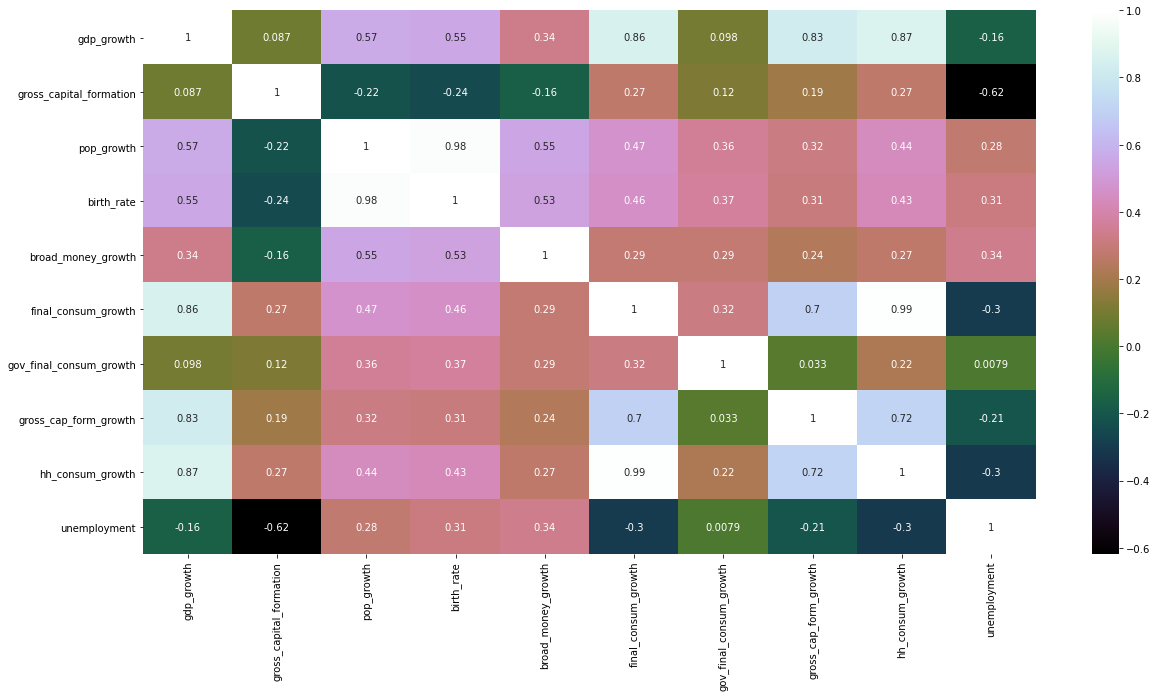

In [14]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix',annot = True)


In [15]:
def corelation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(  corr_matrix.columns)):
        for j in range (i):
            if corr_matrix.iloc[i,j]> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [16]:
cor_features = corelation ( econ_df,0.7)
print (cor_features)


{'hh_consum_growth', 'final_consum_growth', 'gross_cap_form_growth', 'birth_rate'}


In [17]:
econ_df_before = econ_df

In [18]:
X1 = sm.tools.add_constant(econ_df_before)

In [19]:
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
print('DATA BEFORE')
print('-'*100)
display(series_before)





DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

In [20]:
econ_df_after = econ_df.drop(['gdp_growth','birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)
display(econ_df_after)


,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,
1969,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


In [21]:
X2 = sm.tools.add_constant(econ_df_after)
display (X2)


,const,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,
1969,1.0,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,1.0,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,1.0,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,1.0,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,1.0,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,1.0,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,1.0,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,1.0,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,1.0,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


In [22]:
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                      27.891150
pop_growth                  1.971299
broad_money_growth          1.604644
gov_final_consum_growth     1.232229
gross_cap_form_growth       2.142992
hh_consum_growth            2.782698
unemployment                1.588410
dtype: float64

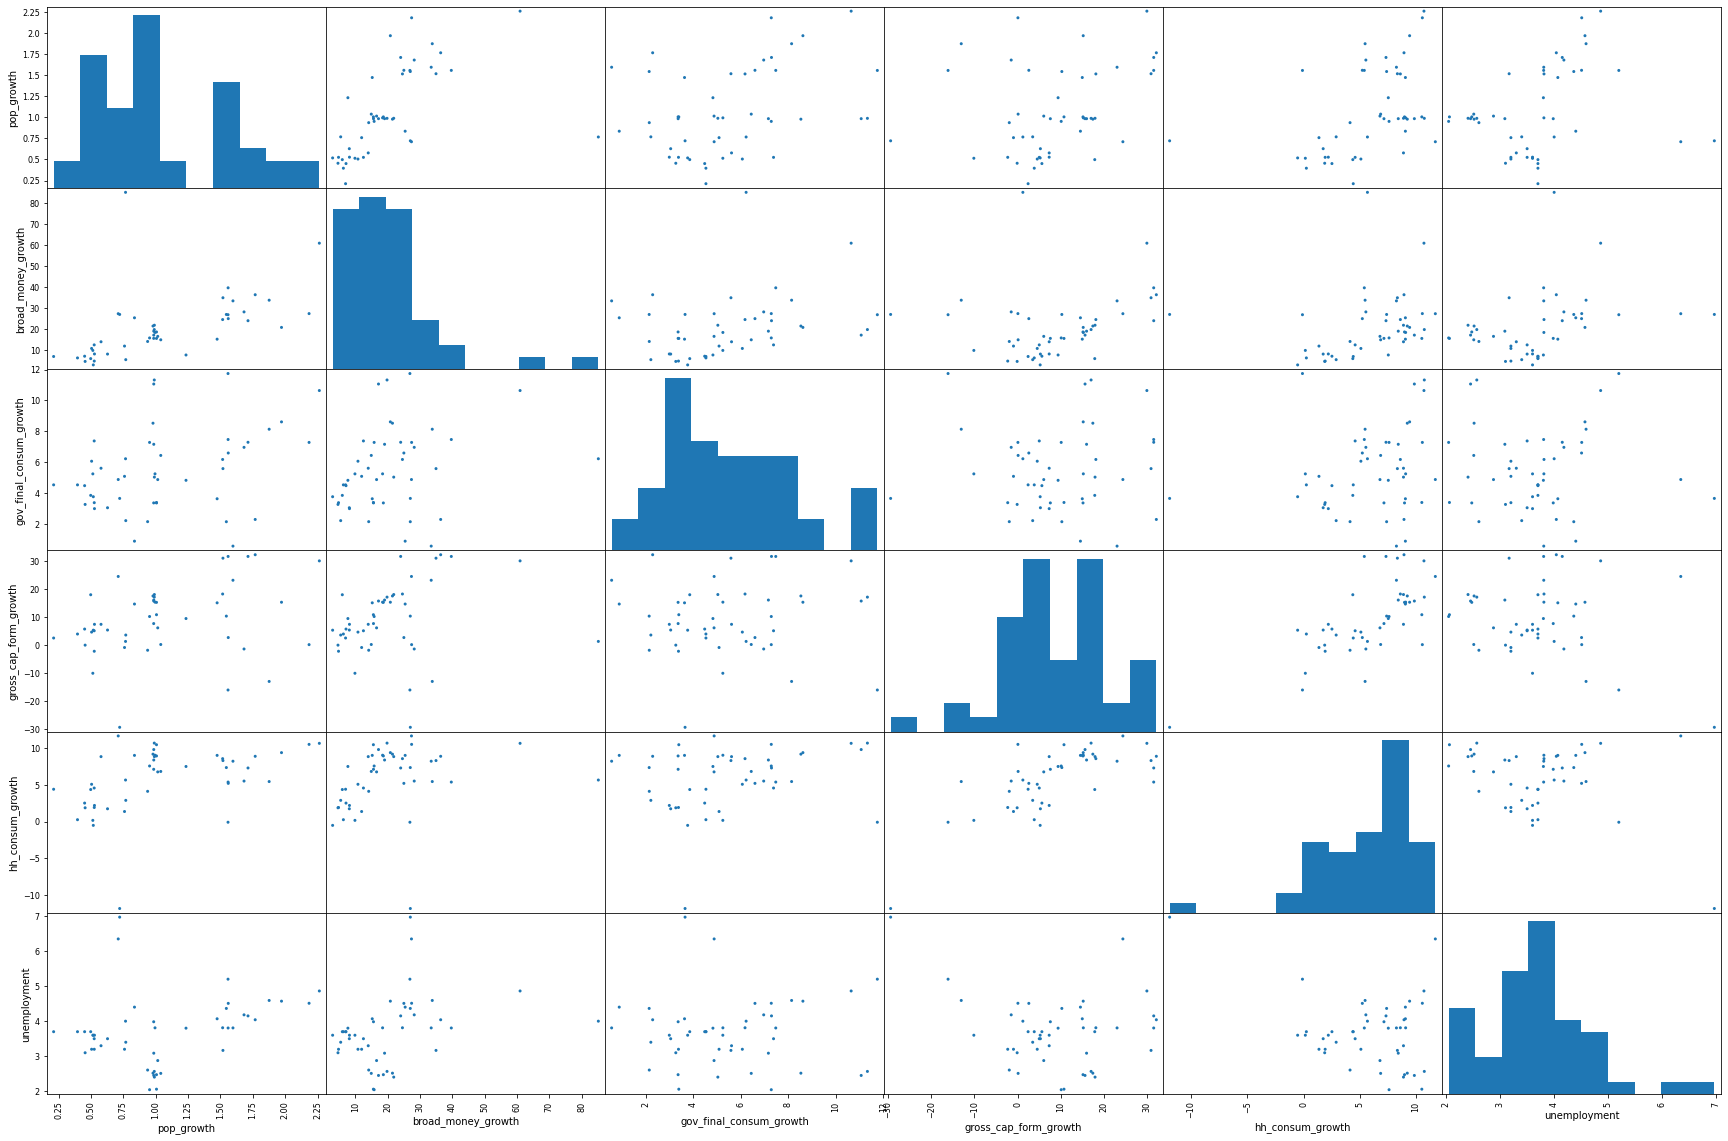

In [26]:
pd.plotting.scatter_matrix(econ_df_after, alpha = 1, figsize = (30, 20))
plt.show()

In [27]:
desc_df = econ_df.describe()
display (desc_df )


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000


In [28]:
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)


In [29]:
display(desc_df)

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [30]:
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis=1)]

In [31]:
econ_df.index.difference(econ_remove_df.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

In [32]:
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

In [33]:
X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [35]:
regression_model = LinearRegression()

In [36]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
intercept = regression_model.intercept_[0]
print (intercept)


2.0797621822382784


In [38]:
coefficent = regression_model.coef_[0]
coefficent 


array([ 1.99004299e+00, -1.71628960e-03, -2.14753943e-01,  1.36759236e-01,
        5.09443554e-01,  2.70147617e-02])

In [39]:
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for ", coef[0],coef[1])


The Coefficient for  pop_growth 1.9900429947038125
The Coefficient for  broad_money_growth -0.0017162895991877818
The Coefficient for  gov_final_consum_growth -0.2147539434794277
The Coefficient for  gross_cap_form_growth 0.13675923639747503
The Coefficient for  hh_consum_growth 0.5094435535166285
The Coefficient for  unemployment 0.027014761728733


In [40]:
y_predict = regression_model.predict(X_test)
y_predict


array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324],
       [ 5.13377964],
       [10.22772664],
       [10.2048022 ],
       [ 3.30365173],
       [ 7.69074121]])

In [41]:
y_test

,gdp_growth
Year,
2002,7.432434
1992,6.175506
2007,5.463396
2005,3.923677
1971,10.454693
1972,7.150715
2000,8.924426
1995,9.570604
2013,2.896205


In [42]:
r2_score (Y, regression_model.predict(X) )

0.8918510699904372

In [43]:
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()
print (est.summary())


                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     57.17
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           2.36e-18
Time:                        11:23:10   Log-Likelihood:                -82.903
No. Observations:                  48   AIC:                             179.8
Df Residuals:                      41   BIC:                             192.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [44]:
import pylab

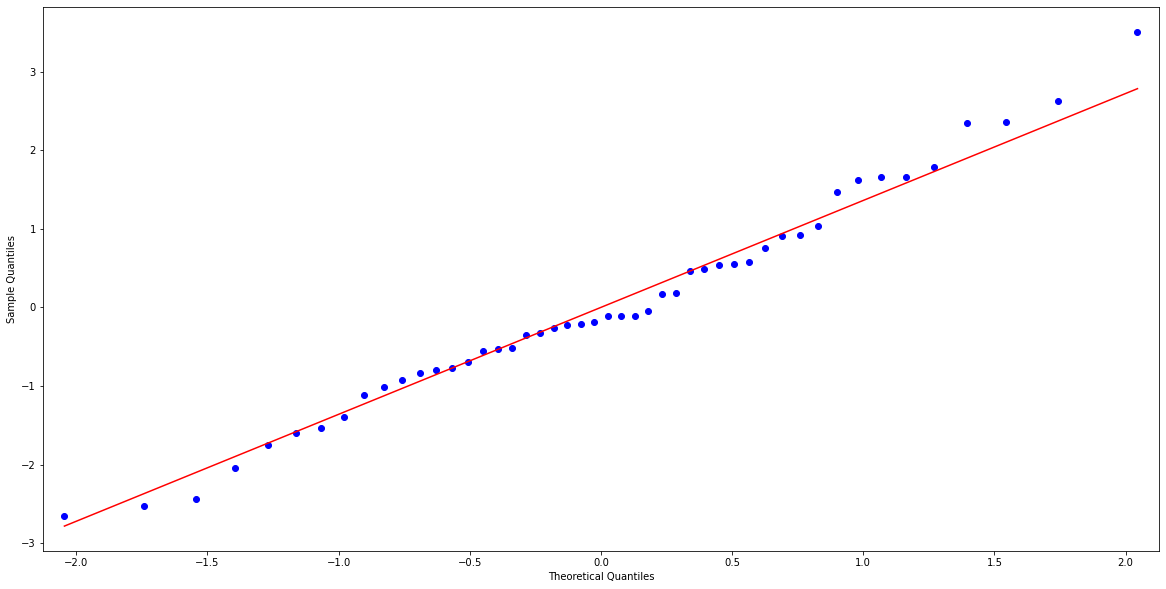

In [45]:
sm.qqplot(est.resid, line='s')
pylab.show()


In [46]:
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))


The mean of the residuals is -2.861e-14


In [47]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))



MSE 0.707
MAE 0.611
RMSE 0.841


In [48]:
import math
model_mse = mean_squared_error(Y, regression_model.predict(X))
model_mae = mean_absolute_error(Y, regression_model.predict(X) )

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))


MSE 1.88
MAE 1.1
RMSE 1.37


In [49]:
est.conf_int()

,0,1
const,-0.323322,4.210608
pop_growth,0.997064,3.366766
broad_money_growth,-0.037652,0.036865
gov_final_consum_growth,-0.372408,-0.005139
gross_cap_form_growth,0.079057,0.179616
hh_consum_growth,0.325648,0.667975
unemployment,-0.570237,0.558631


In [50]:
est.conf_int(alpha = .01)

,0,1
const,-1.088474,4.975759
pop_growth,0.597151,3.766680
broad_money_growth,-0.050228,0.049441
gov_final_consum_growth,-0.434388,0.056842
gross_cap_form_growth,0.062086,0.196587
hh_consum_growth,0.267877,0.725746
unemployment,-0.760746,0.749140


In [51]:
print (est.pvalues)

const                      9.088069e-02
pop_growth                 5.996378e-04
broad_money_growth         9.830934e-01
gov_final_consum_growth    4.419934e-02
gross_cap_form_growth      5.978663e-06
hh_consum_growth           6.801951e-07
unemployment               9.835355e-01
dtype: float64


In [52]:
display(econ_df_after)






,gdp_growth,pop_growth,broad_money_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,
1969,14.541235,2.263434,60.984733,10.640799,29.908118,10.700325,4.8600
1970,9.997407,2.184174,27.422864,7.279573,0.058667,10.557300,4.5100
1971,10.454693,1.971324,20.844481,8.610547,15.172870,9.426969,4.5700
1972,7.150715,1.875999,33.815028,8.134824,-13.056701,5.471355,4.5900
1973,14.827554,1.768293,36.415629,2.287729,32.098276,8.927295,4.0400
1974,9.460873,1.712705,24.036652,7.288576,31.493083,7.328337,4.1500
1975,7.863512,1.682000,28.231630,6.960465,-1.493720,5.539527,4.1800
1976,13.115159,1.596559,33.484656,0.560957,23.006080,8.254930,3.8076
1977,12.277661,1.559039,39.705763,7.468013,31.486450,5.401645,3.8057


In [53]:
econ_df_after_opt = econ_df_after.drop(['broad_money_growth','unemployment'], axis = 1)
econ_df_after_opt


,gdp_growth,pop_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth
Year,,,,,
1969,14.541235,2.263434,10.640799,29.908118,10.700325
1970,9.997407,2.184174,7.279573,0.058667,10.557300
1971,10.454693,1.971324,8.610547,15.172870,9.426969
1972,7.150715,1.875999,8.134824,-13.056701,5.471355
1973,14.827554,1.768293,2.287729,32.098276,8.927295
1974,9.460873,1.712705,7.288576,31.493083,7.328337
1975,7.863512,1.682000,6.960465,-1.493720,5.539527
1976,13.115159,1.596559,0.560957,23.006080,8.254930
1977,12.277661,1.559039,7.468013,31.486450,5.401645


In [54]:
Xopt = econ_df_after_opt.drop('gdp_growth', axis = 1)
Yopt = econ_df_after_opt[['gdp_growth']]


In [55]:
Xopt_train, Xopt_test, yopt_train, yopt_test = train_test_split(Xopt, Yopt, test_size=0.20, random_state=1)

In [56]:
opt_regression_model = LinearRegression()
opt_regression_model.fit(Xopt_train, yopt_train)


LinearRegression()

In [57]:
X2opt = sm.add_constant(Xopt)

In [58]:
X2opt = sm.add_constant(Xopt) # Add constraint 
optmodel = sm.OLS(Yopt, X2opt)


In [59]:
optest = optmodel.fit()
print(optest.summary())


                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     89.94
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           2.61e-20
Time:                        11:25:33   Log-Likelihood:                -82.904
No. Observations:                  48   AIC:                             175.8
Df Residuals:                      43   BIC:                             185.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [60]:
yopt_pred = opt_regression_model.predict(Xopt)
yopt_pred


array([[13.876426  ],
       [10.3024935 ],
       [11.07914932],
       [ 5.13638967],
       [14.10084078],
       [12.01334242],
       [ 6.61656565],
       [12.55194332],
       [10.6909827 ],
       [12.42617936],
       [10.68429049],
       [ 0.48546384],
       [ 6.85049294],
       [ 9.92247158],
       [10.94986425],
       [ 8.67865651],
       [ 8.05876315],
       [ 9.68832931],
       [ 9.02453368],
       [ 9.32101404],
       [ 9.44484151],
       [ 8.85504099],
       [ 9.99735959],
       [ 6.33404458],
       [ 7.40546022],
       [10.05927458],
       [10.23160766],
       [ 7.71835391],
       [ 5.40485681],
       [-7.22225075],
       [11.78932359],
       [10.21546585],
       [ 5.39476673],
       [ 7.6042968 ],
       [ 2.83522524],
       [ 2.63195826],
       [ 4.18180338],
       [ 4.62615319],
       [ 5.06625521],
       [ 3.14625437],
       [ 0.75962682],
       [ 6.983691  ],
       [ 5.16836872],
       [ 3.14827983],
       [ 3.30912778],
       [ 4

In [61]:
print (Yopt)

      gdp_growth
Year            
1969   14.541235
1970    9.997407
1971   10.454693
1972    7.150715
1973   14.827554
1974    9.460873
1975    7.863512
1976   13.115159
1977   12.277661
1978   10.774491
1979    8.625632
1980   -1.701277
1981    7.180511
1982    8.265021
1983   13.242063
1984   10.442911
1985    7.749646
1986   11.224086
1987   12.467266
1988   11.904719
1989    7.029710
1990    9.811230
1991   10.353951
1992    6.175506
1993    6.846744
1994    9.206142
1995    9.570604
1996    7.594509
1997    5.922185
1998   -5.471219
1999   11.308621
2000    8.924426
2001    4.525307
2002    7.432434
2003    2.933218
2004    4.899840
2005    3.923677
2006    5.176154
2007    5.463396
2008    2.829223
2009    0.707510
2010    6.496794
2011    3.681689
2012    2.292398
2013    2.896205
2014    3.341448
2015    2.790236
2016    2.929305


In [62]:
print (r2_score(Yopt,yopt_pred ))

0.8918829127343726


In [63]:
r2_score (Y, regression_model.predict(X) )

0.8918510699904372